<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Изучение данных из файла

In [1]:
import pandas as pd #импортируем pandas
import matplotlib.pyplot as plt #импорт библиотеки matplotlib.pyplot
import numpy as np #импорт библиотеки numpy
np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning) #игнорирование предупреждения
import warnings #импорт warnings
from pandas.core.common import SettingWithCopyWarning  #импорт SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning) #игнорирование предупреждения

In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t') #читаем файл
data.head(10) #выводим первые 10 строк

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [3]:
data.info() #информация о файле

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
total_images,23699.0,9.858475e+00,5.682529e+00,0.0,6.00,9.00,14.0,50.0
last_price,23699.0,6.541549e+06,1.088701e+07,12190.0,3400000.00,4650000.00,6800000.0,763000000.0
total_area,23699.0,6.034865e+01,3.565408e+01,12.0,40.00,52.00,69.9,900.0
rooms,23699.0,2.070636e+00,1.078405e+00,0.0,1.00,2.00,3.0,19.0
ceiling_height,14504.0,2.771499e+00,1.261056e+00,1.0,2.52,2.65,2.8,100.0
floors_total,23613.0,1.067382e+01,6.597173e+00,1.0,5.00,9.00,16.0,60.0
living_area,21796.0,3.445785e+01,2.203045e+01,2.0,18.60,30.00,42.3,409.7
floor,23699.0,5.892358e+00,4.885249e+00,1.0,2.00,4.00,8.0,33.0
kitchen_area,21421.0,1.056981e+01,5.905438e+00,1.3,7.00,9.10,12.0,112.0
balcony,12180.0,1.150082e+00,1.071300e+00,0.0,0.00,1.00,2.0,5.0


### Вывод

По информации о файле можно увидеть, что в столбцах `ceiling_height`, `floors_total`, `living_area`, `is_apartment`, `kitchen_area`,`balcony`, `locality_name`,`airports_nearest`,`cityCenters_nearest`, `parks_around3000`, `parks_nearest`, `ponds_around3000`, `ponds_nearest`, `days_exposition` есть пропуски.

## Предобработка данных

In [5]:
data['ceiling_height'].sort_values().unique() #уникальные значения в столбце 

array([  1.  ,   1.2 ,   1.75,   2.  ,   2.2 ,   2.25,   2.3 ,   2.34,
         2.4 ,   2.45,   2.46,   2.47,   2.48,   2.49,   2.5 ,   2.51,
         2.52,   2.53,   2.54,   2.55,   2.56,   2.57,   2.58,   2.59,
         2.6 ,   2.61,   2.62,   2.63,   2.64,   2.65,   2.66,   2.67,
         2.68,   2.69,   2.7 ,   2.71,   2.72,   2.73,   2.74,   2.75,
         2.76,   2.77,   2.78,   2.79,   2.8 ,   2.81,   2.82,   2.83,
         2.84,   2.85,   2.86,   2.87,   2.88,   2.89,   2.9 ,   2.91,
         2.92,   2.93,   2.94,   2.95,   2.96,   2.97,   2.98,   2.99,
         3.  ,   3.01,   3.02,   3.03,   3.04,   3.05,   3.06,   3.07,
         3.08,   3.09,   3.1 ,   3.11,   3.12,   3.13,   3.14,   3.15,
         3.16,   3.17,   3.18,   3.2 ,   3.21,   3.22,   3.23,   3.24,
         3.25,   3.26,   3.27,   3.28,   3.29,   3.3 ,   3.31,   3.32,
         3.33,   3.34,   3.35,   3.36,   3.37,   3.38,   3.39,   3.4 ,
         3.42,   3.43,   3.44,   3.45,   3.46,   3.47,   3.48,   3.49,
      

В столбце `ceiling_height` пропуски можно заменить на медианное значение, так как высота потолков не особо отличается друг от друга, хотя в данной таблице есть выбросы — более 7 метров, заменим их также на медианное значение.

In [6]:
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median()) #замена пустых значений на медиану
data.loc[data['ceiling_height'] > 7] = data['ceiling_height'].median() #замена выбросов на медиану
data['ceiling_height'].sort_values().unique() #уникальные значения по столбцу

array([1.  , 1.2 , 1.75, 2.  , 2.2 , 2.25, 2.3 , 2.34, 2.4 , 2.45, 2.46,
       2.47, 2.48, 2.49, 2.5 , 2.51, 2.52, 2.53, 2.54, 2.55, 2.56, 2.57,
       2.58, 2.59, 2.6 , 2.61, 2.62, 2.63, 2.64, 2.65, 2.66, 2.67, 2.68,
       2.69, 2.7 , 2.71, 2.72, 2.73, 2.74, 2.75, 2.76, 2.77, 2.78, 2.79,
       2.8 , 2.81, 2.82, 2.83, 2.84, 2.85, 2.86, 2.87, 2.88, 2.89, 2.9 ,
       2.91, 2.92, 2.93, 2.94, 2.95, 2.96, 2.97, 2.98, 2.99, 3.  , 3.01,
       3.02, 3.03, 3.04, 3.05, 3.06, 3.07, 3.08, 3.09, 3.1 , 3.11, 3.12,
       3.13, 3.14, 3.15, 3.16, 3.17, 3.18, 3.2 , 3.21, 3.22, 3.23, 3.24,
       3.25, 3.26, 3.27, 3.28, 3.29, 3.3 , 3.31, 3.32, 3.33, 3.34, 3.35,
       3.36, 3.37, 3.38, 3.39, 3.4 , 3.42, 3.43, 3.44, 3.45, 3.46, 3.47,
       3.48, 3.49, 3.5 , 3.51, 3.52, 3.53, 3.54, 3.55, 3.56, 3.57, 3.58,
       3.59, 3.6 , 3.62, 3.63, 3.65, 3.66, 3.67, 3.68, 3.69, 3.7 , 3.75,
       3.76, 3.78, 3.8 , 3.82, 3.83, 3.84, 3.85, 3.86, 3.87, 3.88, 3.9 ,
       3.93, 3.95, 3.98, 4.  , 4.06, 4.1 , 4.14, 4.

Выведем таблицу, в которой этаж квартиры больше,чем общее количество этажей в доме.

In [7]:
data[data['floor'] > data['floors_total']]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


Количество этажей в доме не должно быть меньше указанного этажа в объявлении.  Заменим пропуски в столбце `floors_total` на медианное значение по этажу, указанного в объявлении.

In [8]:
for floor in data['floor'].unique(): #применим цикл перебора по этажам в таблице
    median = data.loc[data['floor'] == floor, 'floors_total'].median() #найдем медианное значение для определенного этажа по количеству этажей
    print(floor,median) #вывод значений
    data.loc[(data['floors_total'].isna()) & (data['floor'] == floor), 'floors_total'] = median

8.0 10.0
1.0 5.0
4.0 5.0
9.0 10.0
13.0 17.0
5.0 6.0
6.0 9.0
22.0 25.0
26.0 27.0
7.0 10.0
3.0 5.0
2.0 5.0
11.0 16.0
15.0 17.0
18.0 22.0
10.0 16.0
19.0 24.0
16.0 18.0
20.0 24.0
27.0 27.0
25.0 25.0
17.0 22.0
14.0 17.0
12.0 16.0
2.65 2.65
21.0 25.0
28.0 36.0
24.0 25.0
23.0 25.0
30.0 35.0
29.0 36.0
32.0 33.0
33.0 35.0
31.0 35.0


По данным можно заметить подозрительные дробный этаж — 2.65. Выведем усеченную таблицу по данному этажу.

In [9]:
data.query('floor == "2.65"') #вывод таблицы, в которой значения этажа равно 2.65

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
355,2.65,2.65,2.65,2.65,2.65,2.65,2.65,2.65,2.65,2.65,...,2.65,2.65,2.65,2.65,2.65,2.65,2.65,2.65,2.65,2.65
3148,2.65,2.65,2.65,2.65,2.65,2.65,2.65,2.65,2.65,2.65,...,2.65,2.65,2.65,2.65,2.65,2.65,2.65,2.65,2.65,2.65
3474,2.65,2.65,2.65,2.65,2.65,2.65,2.65,2.65,2.65,2.65,...,2.65,2.65,2.65,2.65,2.65,2.65,2.65,2.65,2.65,2.65
4643,2.65,2.65,2.65,2.65,2.65,2.65,2.65,2.65,2.65,2.65,...,2.65,2.65,2.65,2.65,2.65,2.65,2.65,2.65,2.65,2.65
4876,2.65,2.65,2.65,2.65,2.65,2.65,2.65,2.65,2.65,2.65,...,2.65,2.65,2.65,2.65,2.65,2.65,2.65,2.65,2.65,2.65
5076,2.65,2.65,2.65,2.65,2.65,2.65,2.65,2.65,2.65,2.65,...,2.65,2.65,2.65,2.65,2.65,2.65,2.65,2.65,2.65,2.65
5246,2.65,2.65,2.65,2.65,2.65,2.65,2.65,2.65,2.65,2.65,...,2.65,2.65,2.65,2.65,2.65,2.65,2.65,2.65,2.65,2.65
5669,2.65,2.65,2.65,2.65,2.65,2.65,2.65,2.65,2.65,2.65,...,2.65,2.65,2.65,2.65,2.65,2.65,2.65,2.65,2.65,2.65
5807,2.65,2.65,2.65,2.65,2.65,2.65,2.65,2.65,2.65,2.65,...,2.65,2.65,2.65,2.65,2.65,2.65,2.65,2.65,2.65,2.65
5863,2.65,2.65,2.65,2.65,2.65,2.65,2.65,2.65,2.65,2.65,...,2.65,2.65,2.65,2.65,2.65,2.65,2.65,2.65,2.65,2.65


Можно сделать вывод,что это какая-то системная ошибка и удалим эти строки.

In [10]:
data=data.query('floor != "2.65"') #убираем из таблицы строки, где этаж равен 2.65
data['floor'].unique() #уникальные значения этажа

array([ 8.,  1.,  4.,  9., 13.,  5.,  6., 22., 26.,  7.,  3.,  2., 11.,
       15., 18., 10., 19., 16., 20., 27., 25., 17., 14., 12., 21., 28.,
       24., 23., 30., 29., 32., 33., 31.])

В столбцах `living_area`,`kitchen_area` сложно предугадать какого размера площадь на месте пропусков, поэтому имеет смысл оставить данные столбцы без изменений. Проверим уникальные значения столбцов на наличие выбросов. 

In [11]:
data['living_area'].sort_values().unique() #уникальные значения размера жилой площади

array([  2. ,   3. ,   5. , ..., 409. , 409.7,   nan])

In [12]:
data['kitchen_area'].sort_values().unique() #уникальные значения размера кухни

array([  1.3 ,   2.  ,   2.3 ,   2.4 ,   2.89,   3.  ,   3.2 ,   3.3 ,
         3.4 ,   3.5 ,   3.7 ,   3.8 ,   4.  ,   4.1 ,   4.2 ,   4.3 ,
         4.4 ,   4.5 ,   4.6 ,   4.7 ,   4.8 ,   4.9 ,   5.  ,   5.04,
         5.06,   5.1 ,   5.14,   5.2 ,   5.21,   5.23,   5.25,   5.28,
         5.29,   5.3 ,   5.31,   5.33,   5.35,   5.4 ,   5.42,   5.44,
         5.47,   5.49,   5.5 ,   5.53,   5.59,   5.6 ,   5.61,   5.62,
         5.64,   5.65,   5.68,   5.7 ,   5.74,   5.75,   5.78,   5.8 ,
         5.82,   5.85,   5.86,   5.9 ,   5.91,   6.  ,   6.02,   6.03,
         6.1 ,   6.16,   6.19,   6.2 ,   6.22,   6.23,   6.24,   6.25,
         6.26,   6.27,   6.28,   6.3 ,   6.31,   6.33,   6.35,   6.36,
         6.37,   6.4 ,   6.47,   6.5 ,   6.55,   6.58,   6.6 ,   6.61,
         6.62,   6.65,   6.7 ,   6.72,   6.73,   6.76,   6.77,   6.8 ,
         6.82,   6.83,   6.84,   6.86,   6.9 ,   6.91,   6.93,   6.95,
         7.  ,   7.02,   7.03,   7.06,   7.09,   7.1 ,   7.12,   7.15,
      

Жилая площадь в 400 квадратных метров может быть в частном доме, а в 2 квадратных метра в студии, поэтому можно сделать вывод,что с данными в приведенных столбцах все в порядке.

Вероятнее всего, пропуски в столбце `is_apartment` появились из-за того что человек выставил в объявлении не апартаменты и не заполнил этот критерий. Заменим пропуски на `False`.

In [13]:
data['is_apartment'] = data['is_apartment'].fillna(False) #замена пустых значений
data['is_apartment'].value_counts() #подсчет уникальных значений в столбце

False    23623
True        47
Name: is_apartment, dtype: int64

Если человек не указал число балконов — скорее всего, их нет. Такие пропуски правильно заменить на 0.

In [14]:
data['balcony'] = data['balcony'].fillna(0) #замена пустых значений на ноль
data['balcony'].value_counts() #подсчет уникальных значений

0.0    15268
1.0     4188
2.0     3650
5.0      301
4.0      182
3.0       81
Name: balcony, dtype: int64

Пропуски в столбце `days_exposition` можно оставить без изменений. Ниже приведена усеченная таблица с данными пропусками, по которой можно понять, что приведенные строки — непроданные объекты.

In [15]:
data.query('days_exposition.isna()') #вывод таблицы с пропусками в столбце

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20.0,13000000.0,108.00,2019-03-07T00:00:00,3.0,2.70,16.0,51.0,8.0,False,...,25.00,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
7,5.0,7915000.0,71.60,2019-04-18T00:00:00,2.0,2.65,24.0,NaN,22.0,False,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
44,13.0,5350000.0,40.00,2018-11-18T00:00:00,1.0,2.65,22.0,NaN,3.0,False,...,NaN,1.0,Санкт-Петербург,30471.0,11603.0,1.0,620.0,1.0,1152.0,NaN
45,17.0,5200000.0,50.60,2018-12-02T00:00:00,2.0,2.65,9.0,30.3,7.0,False,...,7.00,0.0,Санкт-Петербург,30011.0,12872.0,0.0,NaN,0.0,NaN,NaN
46,17.0,6600000.0,52.10,2019-01-31T00:00:00,2.0,2.60,24.0,29.7,9.0,False,...,8.30,2.0,Санкт-Петербург,15114.0,12702.0,0.0,NaN,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23684,20.0,21400000.0,145.00,2018-11-02T00:00:00,4.0,3.00,26.0,71.4,17.0,False,...,15.60,0.0,Санкт-Петербург,11827.0,11459.0,0.0,NaN,0.0,NaN,NaN
23685,15.0,2490000.0,31.00,2019-01-24T00:00:00,1.0,2.50,5.0,17.3,5.0,False,...,5.60,1.0,Ломоносов,48393.0,51818.0,0.0,NaN,0.0,NaN,NaN
23694,9.0,9700000.0,133.81,2017-03-21T00:00:00,3.0,3.70,5.0,73.3,3.0,False,...,13.83,0.0,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23696,18.0,2500000.0,56.70,2018-02-11T00:00:00,2.0,2.65,3.0,29.7,1.0,False,...,NaN,0.0,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Пропусков в столбце `locality_name` всего 49, можно сделать вывод,что их доля невелика. Скорее всего они могли появится из-за того, что  человек не заполнил населенный пункт. И по таблице ниже, можно сделать вывод,что пропуски в данном столбце не зависят от какого-то определенного столбца.

In [16]:
data.query('locality_name.isna()') #вывод таблицы с пропусками в столбце

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1097,3.0,8600000.0,81.70,2016-04-15T00:00:00,3.0,3.55,5.0,50.80,2.0,False,...,8.80,0.0,NaN,23478.0,4258.0,0.0,NaN,0.0,NaN,147.0
2033,6.0,5398000.0,80.00,2017-05-30T00:00:00,3.0,2.65,4.0,42.60,2.0,False,...,18.60,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.0
2603,20.0,3351765.0,42.70,2015-09-20T00:00:00,1.0,2.65,24.0,15.60,3.0,False,...,10.70,0.0,NaN,22041.0,17369.0,0.0,NaN,1.0,374.0,276.0
2632,2.0,5130593.0,62.40,2015-10-11T00:00:00,2.0,2.65,24.0,33.10,21.0,False,...,8.20,0.0,NaN,22041.0,17369.0,0.0,NaN,1.0,374.0,256.0
3574,10.0,4200000.0,46.50,2016-05-28T00:00:00,2.0,2.65,5.0,30.80,5.0,False,...,6.50,0.0,NaN,27419.0,8127.0,0.0,NaN,1.0,603.0,45.0
4151,17.0,17600000.0,89.50,2014-12-09T00:00:00,2.0,3.00,8.0,39.62,7.0,False,...,13.38,0.0,NaN,25054.0,3902.0,1.0,485.0,3.0,722.0,869.0
4189,7.0,9200000.0,80.00,2015-12-10T00:00:00,3.0,4.00,4.0,52.30,3.0,False,...,10.40,0.0,NaN,21774.0,3039.0,1.0,690.0,1.0,953.0,223.0
4670,1.0,5500000.0,83.00,2015-08-14T00:00:00,3.0,2.65,7.0,NaN,6.0,False,...,NaN,0.0,NaN,26534.0,5382.0,1.0,446.0,1.0,376.0,350.0
5343,19.0,13540000.0,85.50,2016-01-20T00:00:00,3.0,2.65,7.0,59.10,5.0,False,...,8.30,4.0,NaN,10556.0,9538.0,1.0,67.0,0.0,NaN,303.0
5707,7.0,3700000.0,30.00,2016-04-29T00:00:00,1.0,2.65,24.0,20.00,23.0,False,...,NaN,0.0,NaN,21460.0,16788.0,0.0,NaN,1.0,170.0,49.0


Пропуски в дальности до аэропорта, центра города, парков и водоемов, а также их количество скорее всего может говорить о том,что вблизи их нет или эти моменты могли не заполнить люди. В дальнейшем данные столбцы не будут играть важной роли и их можно оставить без изменений.

Заменим тип данных в столбцах на целочисленный `last_price`,`floors_total`,`balcony`,`total_images`, `rooms`, `floor` так как это все должно считаться целым числом, а цена квартиры вряд ли будет с копейками. Также можно было бы перевести в целочисленный тип столбцы `parks_around3000`,`ponds_around3000`,`days_exposition`, но в них есть пустые значения и, поэтому это невозможно сделать. Также заменим тип данных на булевой в столбце `is_apartment`,`studio`, `open_plan`. Столбец `first_day_exposition`  приведем к типу даты.

In [17]:
#заменим тип данных в столбцах
data['last_price'] = data['last_price'].astype('int32')
data['total_images'] = data['total_images'].astype('uint8')
data['rooms'] = data['rooms'].astype('uint8')
data['floors_total'] = data['floors_total'].astype('uint8')
data['floor'] = data['floor'].astype('uint8')
data['balcony'] = data['balcony'].astype('uint8')
data['is_apartment'] = data['is_apartment'].astype('bool')
data['studio'] = data['studio'].astype('bool')
data['open_plan'] = data['open_plan'].astype('bool')
data['total_area'] = data['total_area'].astype('float16')
data['ceiling_height'] = data['ceiling_height'].astype('float16')
data['living_area'] = data['living_area'].astype('float16')
data['kitchen_area'] = data['kitchen_area'].astype('float16')
data['airports_nearest'] = data['airports_nearest'].astype('float16')
data['cityCenters_nearest'] = data['cityCenters_nearest'].astype('float16')
data['parks_around3000'] = data['parks_around3000'].astype('float16')
data['parks_nearest'] = data['parks_nearest'].astype('float16')
data['ponds_around3000'] = data['ponds_around3000'].astype('float16')
data['days_exposition'] = data['days_exposition'].astype('float16')
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
data.info() #перепроверим данные

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23670 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23670 non-null uint8
last_price              23670 non-null int32
total_area              23670 non-null float16
first_day_exposition    23670 non-null datetime64[ns]
rooms                   23670 non-null uint8
ceiling_height          23670 non-null float16
floors_total            23670 non-null uint8
living_area             21767 non-null float16
floor                   23670 non-null uint8
is_apartment            23670 non-null bool
studio                  23670 non-null bool
open_plan               23670 non-null bool
kitchen_area            21398 non-null float16
balcony                 23670 non-null uint8
locality_name           23621 non-null object
airports_nearest        18138 non-null float16
cityCenters_nearest     18161 non-null float16
parks_around3000        18162 non-null float16
parks_nearest           8070 non-null float16
ponds_around30

После изменения типов данных, памяти стало тратиться на 38% меньше.

### Вывод

В данном пункте были заменены пропуски в столбцах `ceiling_height`, `floors_total`, `is_apartment`, `balcony`. В столбцах  `living_area`,  `kitchen_area`, `locality_name`,`airports_nearest`,`cityCenters_nearest`, `parks_around3000`, `parks_nearest`, `ponds_around3000`, `ponds_nearest`, `days_exposition` пропуски оставлены без изменений. 

Были удалены строки с системной ошибкой. 
Типы данных в столбцах `last_price`,`floors_total`,`balcony`,`total_images`, `rooms`, `floor` переведены в целочисленный, и в столбце  `is_apartment`,`studio`, `open_plan` в булевой. Столбец `first_day_exposition`  приведен к типу даты.

## Расчёты и добавление результатов в таблицу

Создадим столбец `price`, который будет хранить цену квадратного метра. 

In [18]:
data['price'] = data['last_price']/data['total_area'] #столбец соотношения цены на квадратный метр   

Столбец `weekday` отвечает за день недели.

In [19]:
data['weekday'] = data['first_day_exposition'].dt.weekday #создание столбца дня недели

Столбец `month`отвечает за месяц.

In [20]:
data['month'] = data['first_day_exposition'].dt.month #создание столбца месяца

Столбец `year`отвечает за год.

In [21]:
data['year'] = data['first_day_exposition'].dt.year #создание столбца год

Столбец `floor_category` отвечает за варианты этажей.

In [22]:
def floor_category(row):
    if row['floor'] == 1:
        return 'первый'
    if row['floor'] == row['floors_total']: 
        return 'последний'
    return 'другой'
data['floor_category'] = data.apply(floor_category, axis = 1) #создание столбца категории этажа

Столбцы `liv_total`, `kit_total` отвечают за соотношение жилой и общей площади и отношение площади кухни к общей соответсвенно.

In [23]:
data['liv_total'] = data['living_area']/data['total_area'] #создание столбца соотношения жилой площади к общей
data['kit_total'] = data['kitchen_area']/data['total_area'] #создание столбца соотношения кухни к общей площади
data.head(5) #проверим наличие созданных столбцов

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price,weekday,month,year,floor_category,liv_total,kit_total
0,20,13000000,108.00000,2019-03-07,3,2.699219,16,51.00000,8,False,...,2.0,755.0,NaN,120370.370370,3,3,2019,другой,0.472168,0.231445
1,7,3350000,40.40625,2018-12-04,1,2.650391,11,18.59375,1,False,...,0.0,NaN,81.0,82907.965971,1,12,2018,первый,0.460205,0.272217
2,10,5196000,56.00000,2015-08-20,2,2.650391,5,34.31250,4,False,...,2.0,574.0,558.0,92785.714286,3,8,2015,другой,0.612793,0.148193
3,0,64900000,159.00000,2015-07-24,3,2.650391,14,NaN,9,False,...,3.0,234.0,424.0,408176.100629,4,7,2015,другой,NaN,NaN
4,2,10000000,100.00000,2018-06-19,2,3.029297,14,32.00000,13,False,...,1.0,48.0,121.0,100000.000000,1,6,2018,другой,0.320068,0.409912


### Вывод

В данном пункте были посчитаны и созданы новые столбцы: `price`, `weekday`, `month`, `year`, `floor_category`, `liv_total`, `kit_total`.

## Исследовательский анализ данных

Построим гистограммы для столбцов площади, цены, числа комнат, высоты потолков.

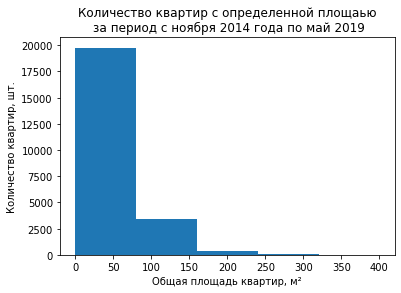

In [24]:
data['total_area'].plot( kind='hist', bins = 5, range = (0,400)) #построение гистогрммы
plt.xlabel('Общая площадь квартир, м²'), plt.ylabel('Количество квартир, шт.')
plt.title('Количество квартир с определенной площаью\n за период с ноября 2014 года по май 2019')
plt.show()

Пик наблюдается в промежутке до 75 квадратных метров. 

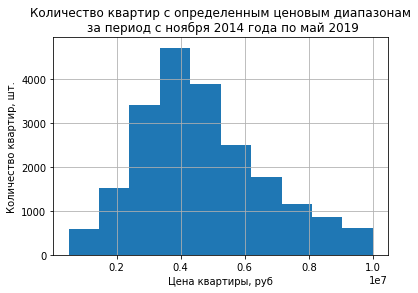

In [25]:
data['last_price'].hist(bins = 10,range = (500000,10000000))  #построение гистогрммы
plt.xlabel('Цена квартиры, руб'), plt.ylabel('Количество квартир, шт.')
plt.title('Количество квартир с определенным ценовым диапазонам\n за период с ноября 2014 года по май 2019')
plt.show()

Пик наблюдается в промежутке от 3 миллионов до 4, значит большая часть квартир продается в промежутке этих двух цен. Второй пик находится в промежутке от 4 до 5 миллионов. 

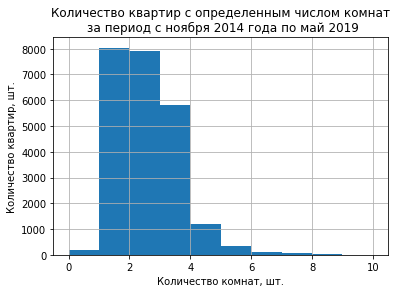

In [26]:
data['rooms'].hist(bins = 10,range = (0,10)) #построение гистогрммы
plt.xlabel('Количество комнат, шт.') , plt.ylabel('Количество квартир, шт.')
plt.title('Количество квартир с определенным числом комнат\n за период с ноября 2014 года по май 2019')
plt.show()

Судя по гистограмме, чаще всего продают однокомнатные и двухкомнатные квартиры.

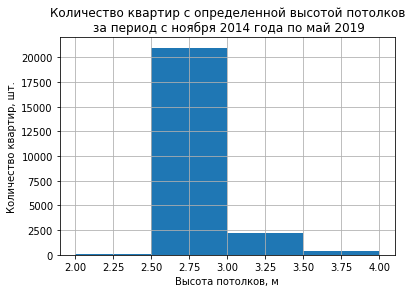

In [27]:
data['ceiling_height'].hist(bins = 4,range = (2,4)) #построение гистогрммы
plt.xlabel('Высота потолков, м') , plt.ylabel('Количество квартир, шт.')
plt.title('Количество квартир с определенной высотой потолков\n за период с ноября 2014 года по май 2019')
plt.show()

Чаще всего продают квартиры с высотой потолков от 2.50 до 3 метров.

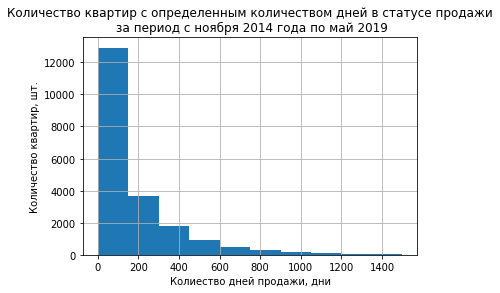

In [28]:
data['days_exposition'].hist(bins = 10,range = (0,1500)) #построение гистогрммы
plt.xlabel('Колиество дней продажи, дни') , plt.ylabel('Количество квартир, шт.')
plt.title('Количество квартир с определенным количеством дней в статусе продажи\n за период с ноября 2014 года по май 2019')
plt.show()

Найдем числовое описание столбца.

In [29]:
data['days_exposition'].describe() #числовое описание столбца

count    20495.0
mean         inf
std          inf
min          1.0
25%         45.0
50%         95.0
75%        232.0
max       1580.0
Name: days_exposition, dtype: float64

Судя по гистограмме, квартиры чаще всего продаются за первые 100 дней, но кто-то не может продать квартиру и за 4 года. Медиана оправдывает предположение о продаже квартир в течение 100 дней. По среднему можно сделать вывод, что квартиры продаются за полгода. Создадим усеченные таблицы с долгими и быстрыми продажами.

In [30]:
data.query('days_exposition > 1400') #усеченная таблица долгой продажи

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price,weekday,month,year,floor_category,liv_total,kit_total
521,20,25717300,230.12500,2015-01-21,3,2.650391,3,130.000000,1,False,...,3.0,278.0,1441.0,111753.612167,2,1,2015,первый,0.564941,0.113403
1109,1,34878556,95.81250,2014-12-09,2,2.650391,6,58.312500,5,True,...,3.0,569.0,1572.0,364029.286367,1,12,2014,другой,0.608398,0.208740
1885,2,13300000,79.62500,2014-12-09,2,3.000000,8,42.687500,7,False,...,0.0,NaN,1513.0,167032.967033,1,12,2014,другой,0.536133,0.226074
2941,3,10090000,71.87500,2015-02-02,2,2.650391,10,34.093750,9,False,...,1.0,434.0,1458.0,140382.608696,0,2,2015,другой,0.474365,0.233643
4736,11,6650000,68.31250,2015-02-19,4,2.630859,5,45.093750,4,False,...,3.0,453.0,1477.0,97346.752059,3,2,2015,другой,0.660156,0.131714
6006,4,4400000,38.62500,2015-02-03,1,2.849609,25,15.000000,6,False,...,0.0,NaN,1452.0,113915.857605,1,2,2015,другой,0.388428,0.318359
6691,3,4400000,42.96875,2014-12-12,1,2.650391,5,18.718750,1,False,...,3.0,232.0,1512.0,102400.000000,4,12,2014,первый,0.435547,0.263184
6726,6,11995000,83.81250,2014-11-27,2,2.730469,11,42.312500,1,False,...,3.0,303.0,1406.0,143117.076808,3,11,2014,первый,0.504883,0.212891
9553,11,10600000,80.00000,2014-12-09,3,2.849609,17,44.000000,9,False,...,0.0,NaN,1553.0,132500.000000,1,12,2014,другой,0.549805,0.187500
9555,11,9950000,61.18750,2015-04-06,2,3.169922,7,39.687500,2,False,...,0.0,NaN,1434.0,162614.913177,0,4,2015,другой,0.648438,0.130737


In [31]:
data.query('days_exposition < 3') #усеченная таблица быстрой продажи

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price,weekday,month,year,floor_category,liv_total,kit_total
1632,19,4000000,49.90625,2019-05-01,2,2.500000,9,25.000000,1,False,...,1.0,681.0,1.0,80150.281778,2,5,2019,первый,0.500977,0.200317
13061,20,6100000,51.40625,2019-04-29,2,3.000000,5,31.703125,4,False,...,0.0,NaN,2.0,118662.613982,0,4,2019,другой,0.616699,0.134155
16053,4,4070000,45.09375,2019-04-30,2,2.650391,5,22.703125,3,False,...,0.0,NaN,2.0,90256.410256,1,4,2019,другой,0.503418,0.146362
16212,0,7806000,25.00000,2019-04-30,1,3.000000,5,NaN,5,False,...,0.0,NaN,2.0,312240.000000,1,4,2019,последний,NaN,NaN


По данным таблицам можно сделать вывод,что самые долгие продажи были зимой 2015-2014 года. Самые быстрые продажи были весной 2019.

Уберем редкие и выбивающиеся значения.  По гистограммам выше, можно отобрать площадь квартиры не боле 200 квадратных метров, до 6 комнат, продажа в течение 1000 дней и стоимость не более 10 миллионов, потолки выше 2.50.

In [32]:
#создание новой таблицы
good_data=data.query('total_area < 200 and rooms < 6 and days_exposition < 1000 and last_price < 10000000 and ceiling_height > 2.50 ') 
good_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15309 entries, 1 to 23695
Data columns (total 29 columns):
total_images            15309 non-null uint8
last_price              15309 non-null int32
total_area              15309 non-null float16
first_day_exposition    15309 non-null datetime64[ns]
rooms                   15309 non-null uint8
ceiling_height          15309 non-null float16
floors_total            15309 non-null uint8
living_area             14019 non-null float16
floor                   15309 non-null uint8
is_apartment            15309 non-null bool
studio                  15309 non-null bool
open_plan               15309 non-null bool
kitchen_area            13646 non-null float16
balcony                 15309 non-null uint8
locality_name           15269 non-null object
airports_nearest        11479 non-null float16
cityCenters_nearest     11490 non-null float16
parks_around3000        11490 non-null float16
parks_nearest           4668 non-null float16
ponds_around30

С данными условиями удалилось около 8000 строк, в новой таблице остались наиболее распространенные данные.  

Построим диаграммы рассеяния, где на оси у будет цена квартиры, а на оси х общая площадь, удаленность от центра соответственно.

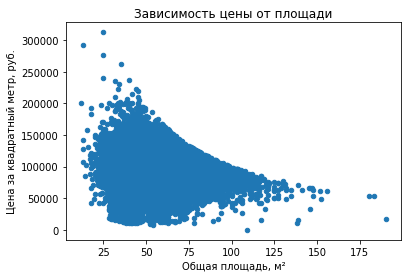

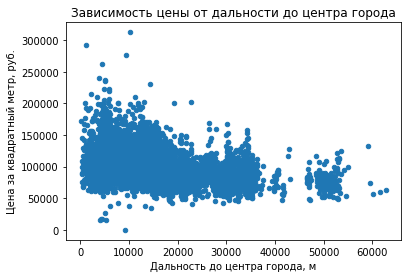

In [33]:
good_data.plot(x='total_area', y='price', kind='scatter') #построение графика
plt.xlabel('Общая площадь, м²') , plt.ylabel('Цена за квадратный метр, руб.')
plt.title('Зависимость цены от площади')
plt.show()
good_data.plot(x='cityCenters_nearest', y='price', kind='scatter') #построение графика
plt.xlabel('Дальность до центра города, м') , plt.ylabel('Цена за квадратный метр, руб.')
plt.title('Зависимость цены от дальности до центра города')
plt.show()

Для комнат построим диаграмму размаха.

(1, 200000)

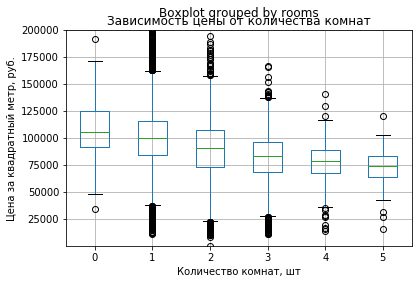

In [34]:
good_data.boxplot(column ='price', by ='rooms') #построение графика
plt.xlabel('Количество комнат, шт') , plt.ylabel('Цена за квадратный метр, руб.')
plt.title('Зависимость цены от количества комнат')
plt.ylim(1,200000)

По данным диаграммам можно делать вывод, что общая площадь и цена взаимосвязаны. Чем больше площадь, тем выше цена. Количество комнат связано с ценой, заметно, что если комнат 0, то  медианная цена за один квадратный метр чаще всего высокая, а если комнат 5,то низкая. Удаленность от центра мало зависит от цены. Дешевые квартиры можно найти вблизи центра. 

Для категории этажа построим также диаграмму размаха.

(1, 200000)

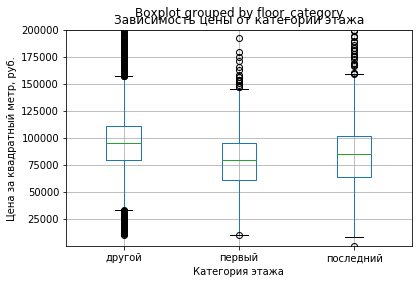

In [35]:
good_data.boxplot(column='price', by='floor_category') #построение графика
plt.xlabel('Категория этажа') , plt.ylabel('Цена за квадратный метр, руб.')
plt.title('Зависимость цены от категории этажа')
plt.ylim(1,200000)

Медианные цены несильно отличаются друг от друга, однако заметно, на первом этаже квартиры стоят дешевле.

Аналогичные диагарммы зависимости цены построим для дня недели, месяца и года.

(0, 260000)

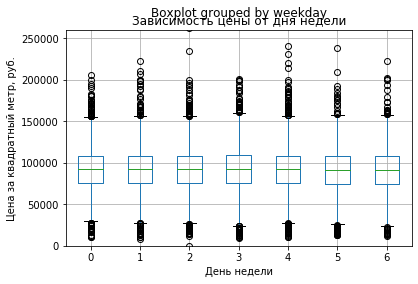

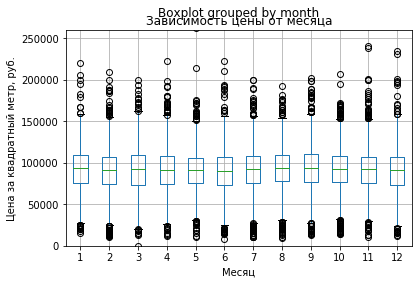

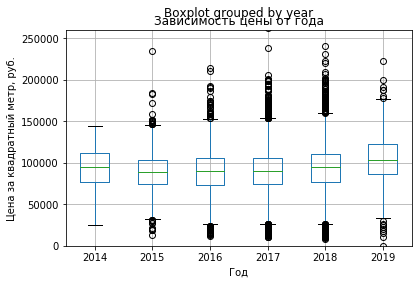

In [36]:
#построение графиков
good_data.boxplot(column='price', by='weekday')
plt.xlabel('День недели') , plt.ylabel('Цена за квадратный метр, руб.')
plt.title('Зависимость цены от дня недели')
plt.ylim(0,260000)
good_data.boxplot(column='price', by='month')
plt.xlabel('Месяц') , plt.ylabel('Цена за квадратный метр, руб.')
plt.title('Зависимость цены от месяца')
plt.ylim(0,260000)
good_data.boxplot(column='price', by='year')
plt.xlabel('Год') , plt.ylabel('Цена за квадратный метр, руб.')
plt.title('Зависимость цены от года')
plt.ylim(0,260000)

День недели практически не влияет на цену, хотя в воскресение они немного дешевле. В середине года медианная цена ниже,чем в начале и конце. А в 2014 году квартиры стоили дороже,чем в 2015, с 2016 года цена начала расти. 

С помощью сводной таблицы создадим новую переменную, где будут указана локация и средняя цена в данном населенном пункте. Оставим 10 таких пунктов.

In [37]:
#создание сводной таблицы
data_loc = good_data.pivot_table(index = 'locality_name', values = 'price', aggfunc = ['mean','count'])
data_loc.columns = ['mean_price','count'] #переименование столбцов
data_loc.query('count > 170').sort_values(by='mean_price') 

,mean_price,count
locality_name,,
Выборг,57565.325728,171
Всеволожск,66663.699635,305
Гатчина,67963.843913,208
Колпино,74419.909295,211
посёлок Шушары,77877.074021,376
посёлок Мурино,85828.219879,502
посёлок Парголово,89627.899073,287
деревня Кудрово,92144.469017,290
Пушкин,100788.330811,211


По данной таблице можно сделать вывод, что самые высокие цены в Санкт-Петербурге и Пушкине, самые низкие цены в Выборге.

Создадим таблицу по Санкт-Петербургу.

In [38]:
data_spb = good_data.query('locality_name == "Санкт-Петербург"')

In [39]:
data_spb=data_spb.dropna(subset=['cityCenters_nearest']) #удаление пустых значений
data_spb.loc[:,'cityCenters_nearest'] /=1000 #преобразование столбца с метрами до километров

In [40]:
data_spb['cityCenters_nearest'] = data_spb['cityCenters_nearest'].astype('int16')

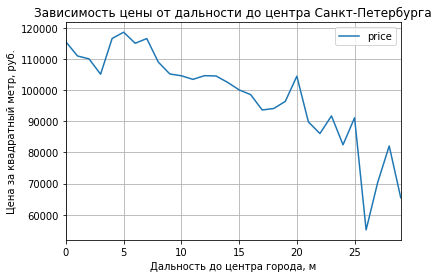

In [41]:
spb = data_spb.pivot_table(index='cityCenters_nearest', values ='price')
spb.columns = ['price']
spb.plot( y = 'price', grid= True)
plt.xlabel('Дальность до центра города, м') , plt.ylabel('Цена за квадратный метр, руб.')
plt.title('Зависимость цены от дальности до центра Санкт-Петербурга')
plt.show()

График резко возрастает в радиусе примерно 3 километрах от центра. Самые дорогие квартиры в Санкт-Петербурге находятся в радиусе 5 километрах от центра, далее цена снижается.

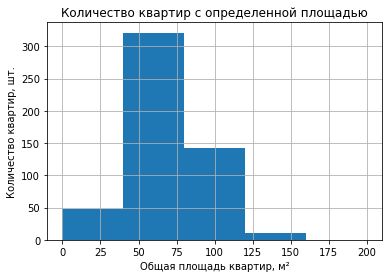

In [42]:
spb_centr = data_spb.query('cityCenters_nearest <= 3')
spb_centr['total_area'].hist(bins = 5,range = (0,200))
plt.xlabel('Общая площадь квартир, м²'), plt.ylabel('Количество квартир, шт.')
plt.title('Количество квартир с определенной площадью')
plt.show()

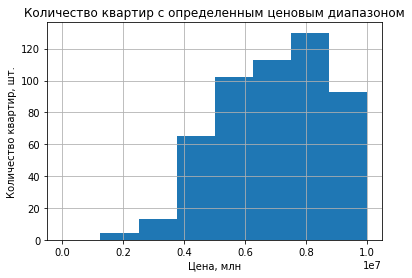

In [43]:
spb_centr['last_price'].hist(bins = 8,range = (0,10000000))
plt.xlabel('Цена, млн'), plt.ylabel('Количество квартир, шт.')
plt.title('Количество квартир с определенным ценовым диапазоном')
plt.show()

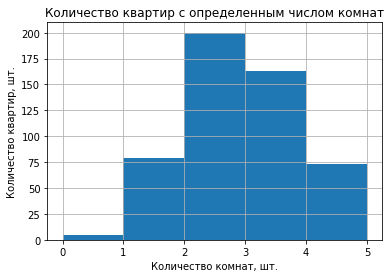

In [44]:
spb_centr['rooms'].hist(bins = 5,range = (0,5))
plt.xlabel('Количество комнат, шт.'), plt.ylabel('Количество квартир, шт.')
plt.title('Количество квартир с определенным числом комнат')
plt.show()

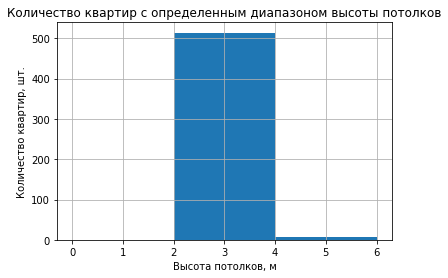

In [45]:
spb_centr['ceiling_height'].hist(bins = 3,range = (0,6))
plt.xlabel('Высота потолков, м'), plt.ylabel('Количество квартир, шт.')
plt.title('Количество квартир с определенным диапазоном высоты потолков')
plt.show()

В центре чаще всего встречаются квартиры с площадью от 35 до 80 квадратных метров, аналогично большой таблице, только с меньшим разбросом. Квартиры стоят около 8 миллионов, а в основной таблице в 2 раза меньше. В центре преобладают двухкомнатные и трехкомнатные квартиры, в общей таблице однокомнатные и двухкомнатные. В центре распространены высокие потолки от 2 до 3 метров, аналогично общей таблице.

### Вывод

В данном пункте был произведен исследовательский анализ данных. Построены гистограммы для площади, цены, числа комнат, высоты потолков. Изучено время продажи квартиры. Убраны редкие и выбивающиеся значения.  Выявлены факторы, влияющие на цену квартиры. Выбраны 10 населённых пунктов с наибольшим числом объявлений, для которых посчитана средняя цена квадратного метра. Среди них выявлены населённые пункты с самой высокой и низкой стоимостью жилья. Выделены квартиры в Санкт-Петербурге,в котором был в дальнейшем обозначен радиус центра. Данные по радиусу были сравнены между собой с данными общей таблицы.

## Общий вывод

В данной работе был проведен анализ продажи квартир в Ленинградксой области. Квартиры чаще всего продаются за первые 100 дней со дня объявления. В основном продаются однокомнатные и двухкомнатные квартиры до 75 квадратных метров и средняя цена варьируется от 3 до 5 миллионов рублей.Чаще всего продают квартиры с высотой потолков от 2.50 до 3 метров.

По данным таблицам можно сделать вывод,что самые долгие продажи были зимой 2015-2014 года. Самые быстрые продажи были весной 2019. 

Общая площадь и цена взаимосвязаны. Чем больше площадь, тем выше цена. Количество комнат связано с ценой, заметно, что если комнат 0, то медианная цена за один квадратный метр чаще всего высокая, а если комнат 5,то низкая. Удаленность от центра мало зависит от цены. Дешевые квартиры можно найти вблизи центра.

День недели практически не влияет на цену, хотя в воскресение они немного дешевле. В середине года медианная цена ниже,чем в начале и конце. А в 2014 году квартиры стоили дороже,чем в 2015, с 2016 года цена начала расти.

Выявлены 10 населенных пунктов Ленинградской области с самыми высокими средними ценами за квадратный метр. Самые высокие цены в Санкт-Петербурге и Пушкине, самые низкие цены в Выборге.

Самые дорогие квартиры в Санкт-Петербурге находятся в радиусе 5 километрах от центра, далее цена снижается.

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод info())
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  посчитано и добавлено в таблицу: цена квадратного метра
- [x]  посчитано и добавлено в таблицу: день недели, месяц и год публикации объявления
- [x]  посчитано и добавлено в таблицу: этаж квартиры; варианты — первый, последний, другой
- [x]  посчитано и добавлено в таблицу: соотношение жилой и общей площади, а также отношение площади кухни к общей
- [x]  изучены следующие параметры: площадь, цена, число комнат, высота потолков
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?"
- [x]  выполнено задание: "Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили."
- [x]  выполнено задание: "Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра. Также изучите зависимость от даты размещения: дня недели, месяца и года. "Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце '*locality_name'*. "
- [x]  выполнено задание: "Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге (*'locality_name'*). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона. "
- [x]  выполнено задание: "Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?"
- [x]  в каждом этапе есть выводы
- [x]  есть общий вывод